Decision Tree ---> to make decisions by monitoring the different attributes provided
+++Advantage++++
 Easy to understand
 No Assumption
 Performance
++++disadv+++++++
  overfitting
  Bias
  Unstable Algorithm
  Limited Expressivenes


1.entropy : measure of the randomness or unpredictability in the dataset.

2.Information Gain : how much entropy was removed during splitting on the node

 IG(T,A) = Entropy(T) - SUM Tv/T. Entropy(Tv)


 Entropy(T) ---> Parent Node before split...
 Entropy(Tv) ---> Entropies after split
 T ---> Total number of instances before split
 Tv ----> Number of instances after split

 3. Gini Impurity : purity of the split at nodes of the decision tree

 G = 1- SUMp^2

Q: which drug would be best for a future patient with the same illness... (Multicalss Classification )

In [4]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#preprocessing steps
# first step looking for null values

df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [9]:
#sec step looking for duplicate function
#df.duplicated().sum()
df[df.duplicated()]


,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Sex
M    104
F     96
Name: count, dtype: int64


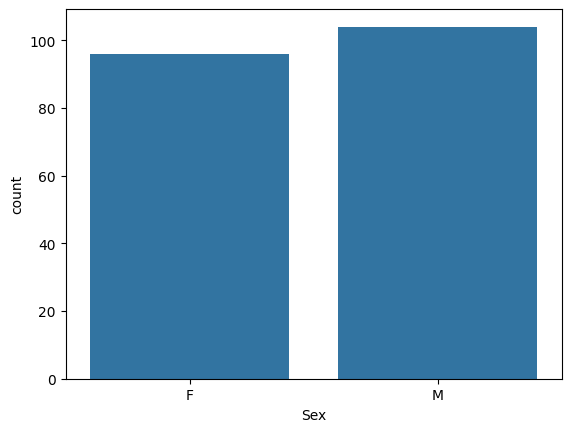

In [13]:
x = df.Sex.value_counts()
print(x)
p = sns.countplot(data=df, x='Sex')
plt.show()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


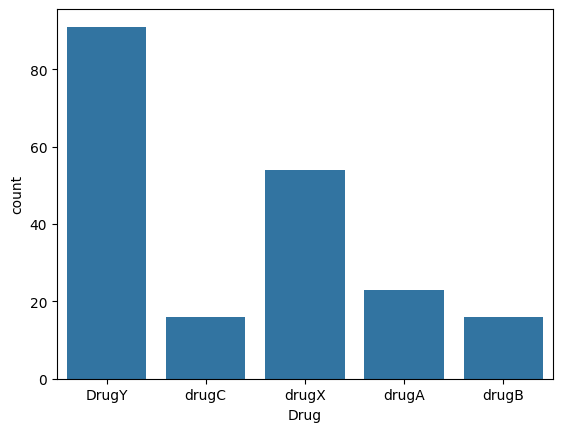

In [14]:
x = df.Drug.value_counts()
print(x)
p = sns.countplot(data=df, x='Drug')
plt.show()

In [15]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<ipython-input-20-35bc18db9dd3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug'] == 'drugY']['Age'], color='red')
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
<ipython-input-20-35bc18db9dd3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.g

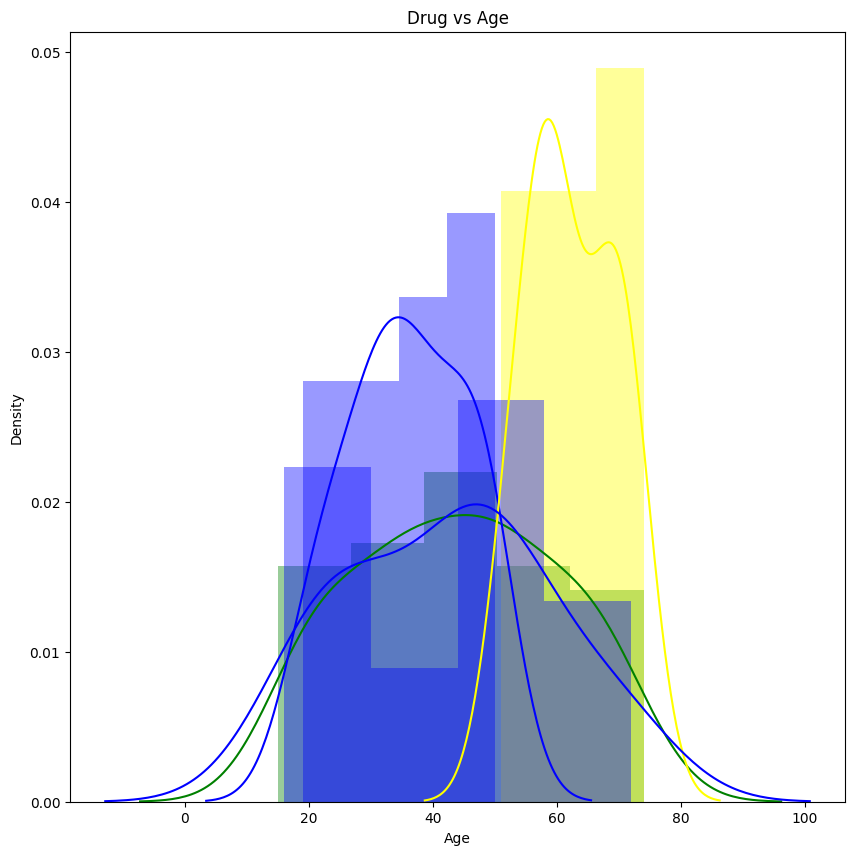

In [20]:
#visualizes the distribution of patients' ages for each drug, enabling you to compare how the age of patients varies for each drug visually.

plt.figure(figsize=(10,10))
sns.distplot(df[df['Drug'] == 'drugY']['Age'], color='red')
sns.distplot(df[df['Drug'] == 'drugX']['Age'], color='green')
sns.distplot(df[df['Drug'] == 'drugA']['Age'], color='blue')
sns.distplot(df[df['Drug'] == 'drugB']['Age'], color='yellow')
sns.distplot(df[df['Drug'] == 'drugC']['Age'], color='blue')
plt.title('Drug vs Age')
plt.show()

In [21]:
#convert categorical to numerical
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[['Sex', 'BP', 'Cholesterol','Drug']] = oe.fit_transform(df[['Sex', 'BP', 'Cholesterol','Drug']])

In [22]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


In [23]:
x = df.iloc[:, 0:-1]
y= df.iloc[:, -1]

In [24]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [25]:
y

,Drug
0,0.0
1,3.0
2,3.0
3,4.0
4,0.0
...,...
195,3.0
196,3.0
197,4.0
198,4.0


In [26]:
#importing train test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size=0.2)

In [27]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_gini.fit(x_train, y_train)
y_pred_ini = clf_gini.predict(x_test)

In [28]:
y_pred_ini

array([4., 0., 4., 3., 0., 0., 0., 4., 1., 4., 1., 4., 0., 1., 2., 0., 2.,
       4., 3., 0., 2., 4., 4., 0., 0., 0., 3., 4., 0., 4., 0., 3., 3., 0.,
       1., 0., 4., 1., 0., 1.])

In [29]:
#check the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_ini))

1.0


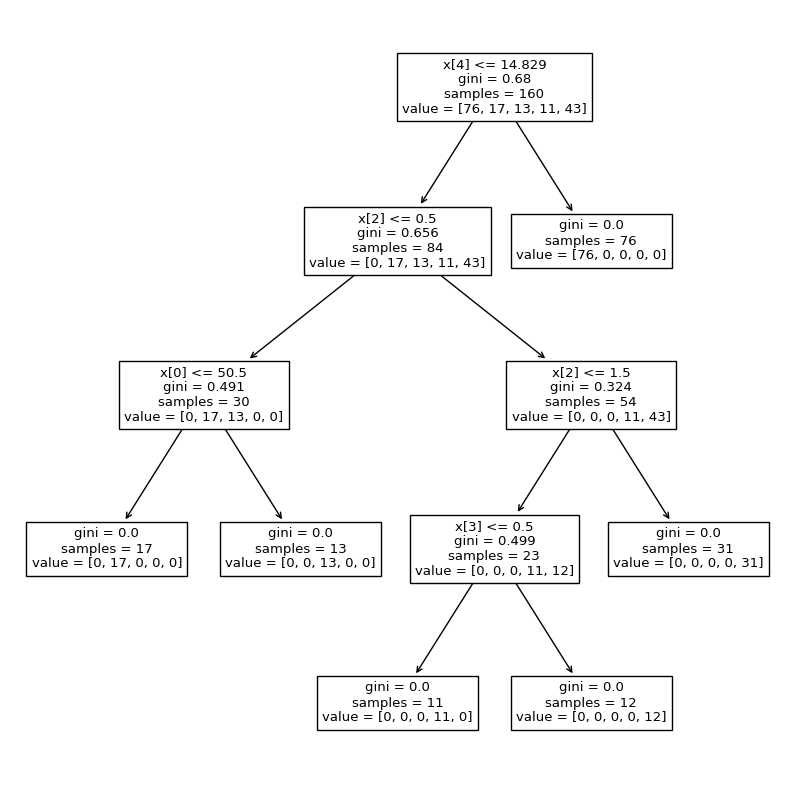

In [33]:
from sklearn import tree
#made decision based on gini value
plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(x_train,y_train))
plt.show()

In [39]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth =3,random_state=0)
clf_entropy.fit(x_train, y_train)
y_pred_ent = clf_entropy.predict(x_test)

In [40]:
print(accuracy_score(y_test, y_pred_ent))

0.875


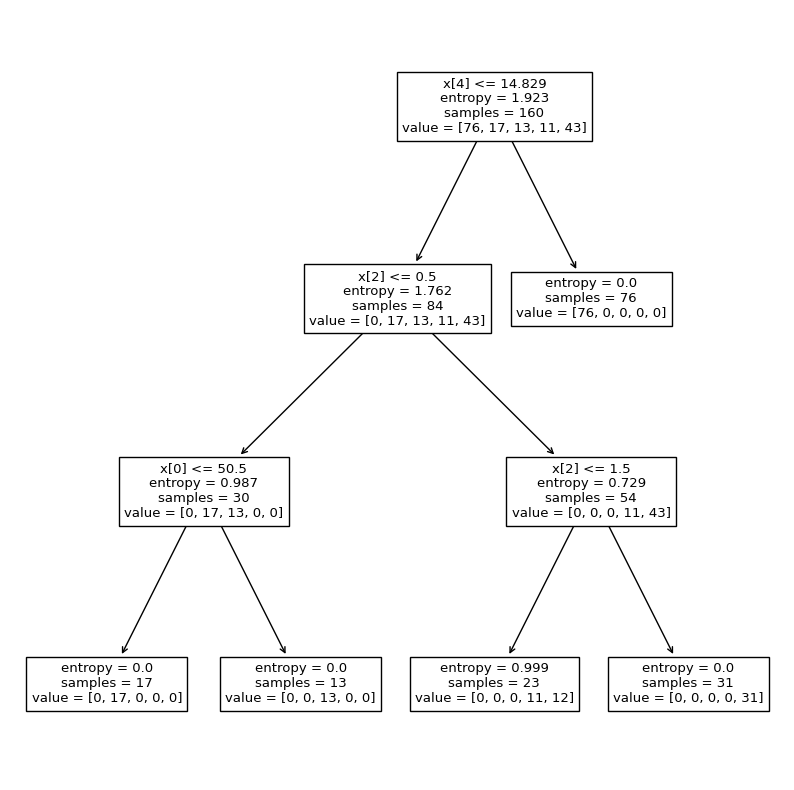

In [36]:
from sklearn import tree
#made decision based on entropy
plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(x_train,y_train))
plt.show()